In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.classifier import *
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.naive_bayes import *
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform
from skopt import BayesSearchCV
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from feature import *
from Modelling import *
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
# Suppress the specific UserWarning from skopt
warnings.filterwarnings("ignore", category=UserWarning, module="skopt.optimizer")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data =  pd.read_excel('bank-additional-full.xlsx')
data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


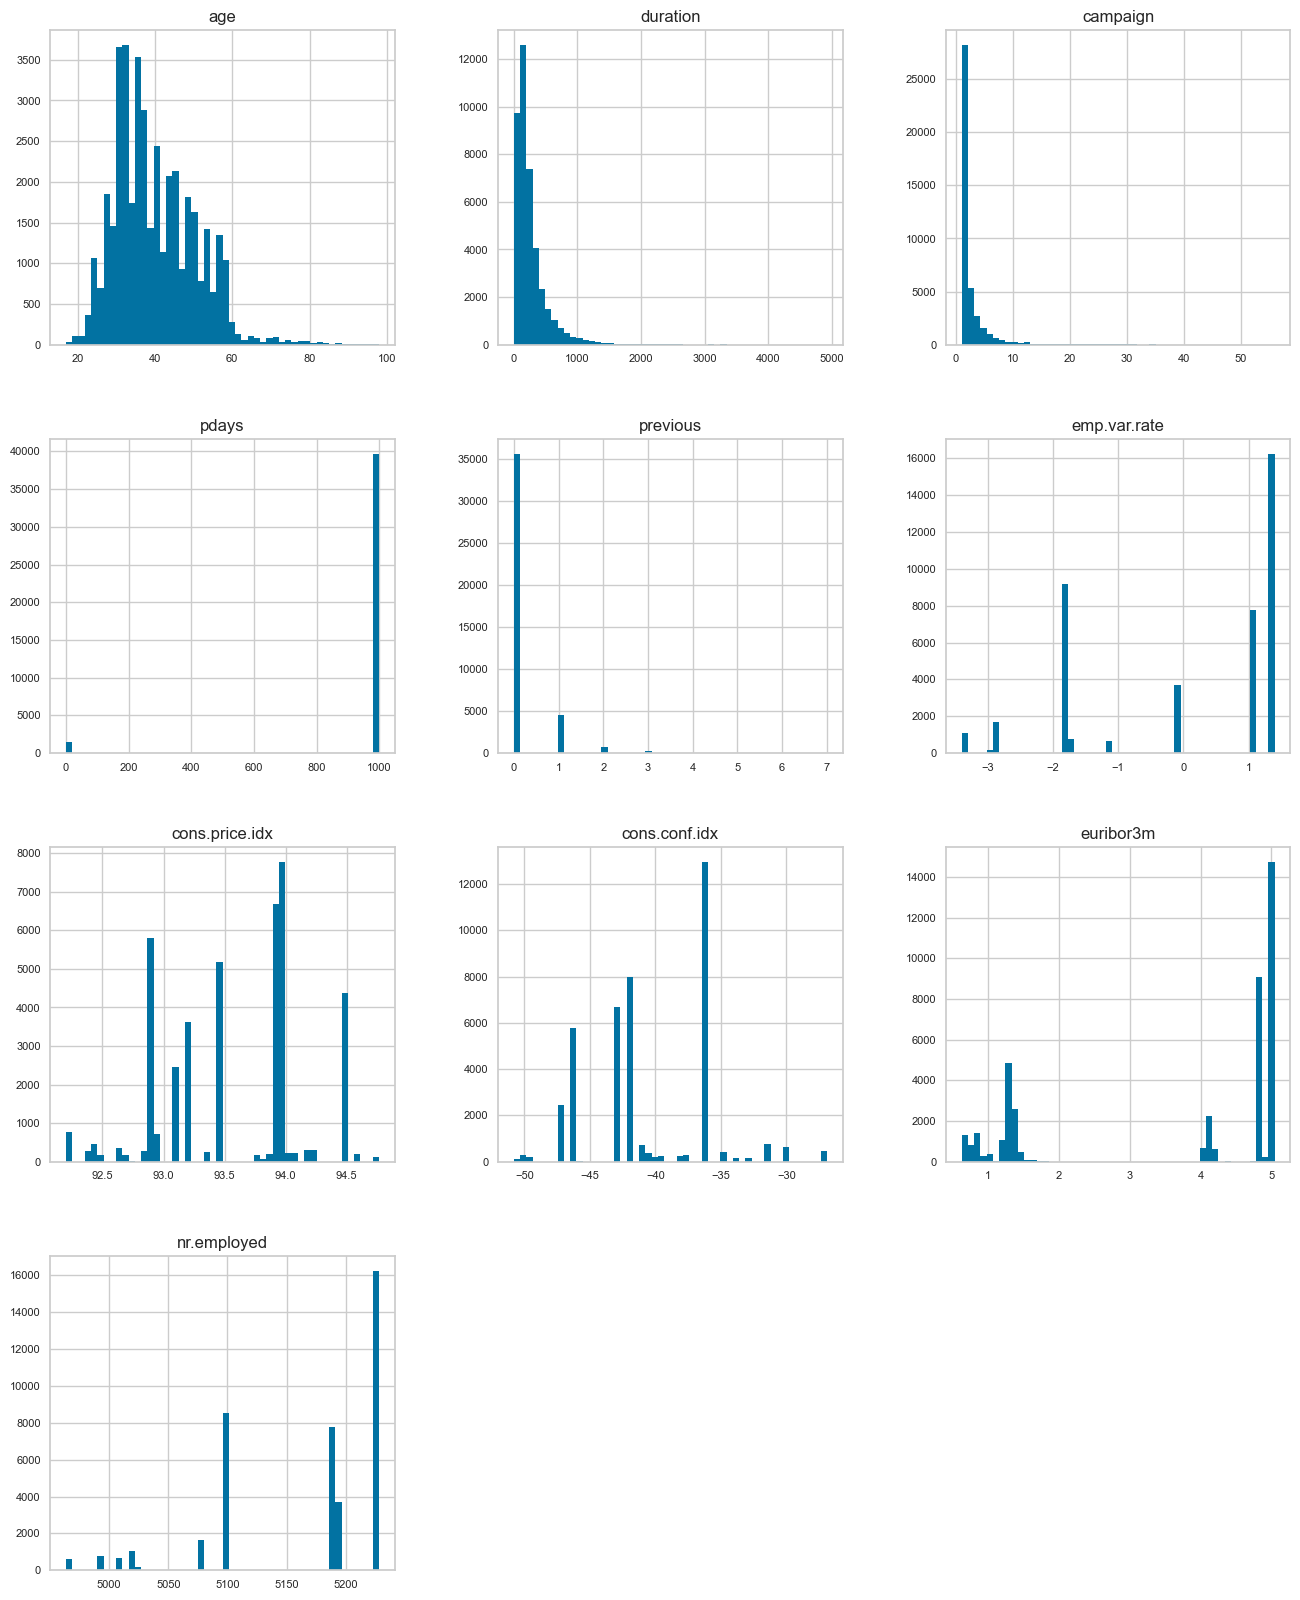

In [5]:
def data_preprocessing(data):
    # Display DataFrame info
    print("DataFrame Info:")
    data.info()

    # Display DataFrame description
    print("\nDataFrame Description:")
    print(data.describe())

    # Display null values count
    print("\nNull Values Count:")
    print(data.isnull().sum())

    # Display duplicated rows count
    print("\nDuplicated Rows Count:", data.duplicated().sum())

    # Display number of unique values in each column
    print("\nNumber of Unique Values in Each Column:")
    print(data.nunique())
    
    # Plot histrogram for all column
    data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    
    return data
data = data_preprocessing(data)
data


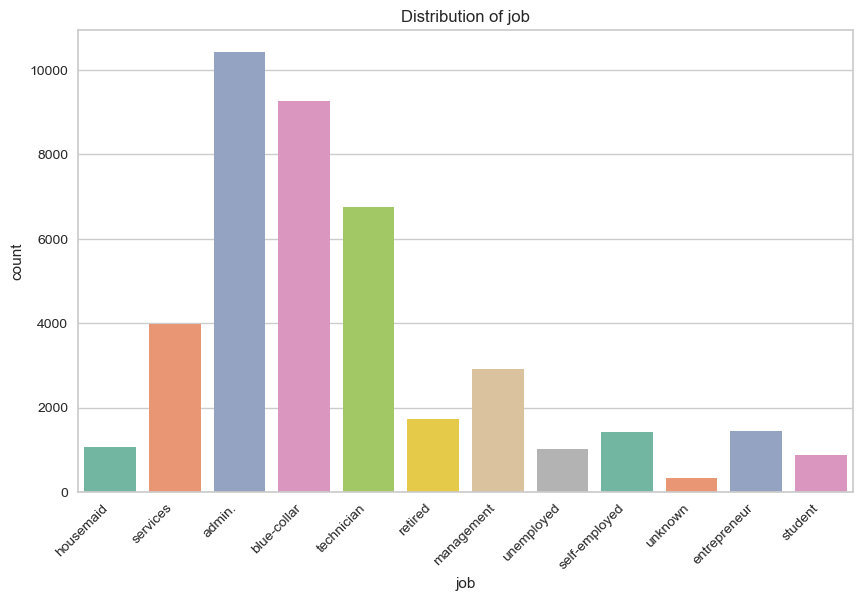

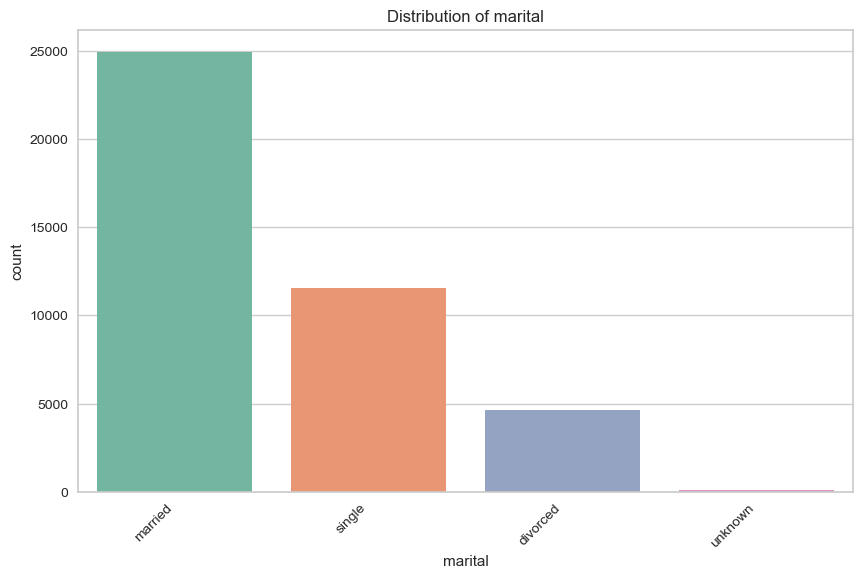

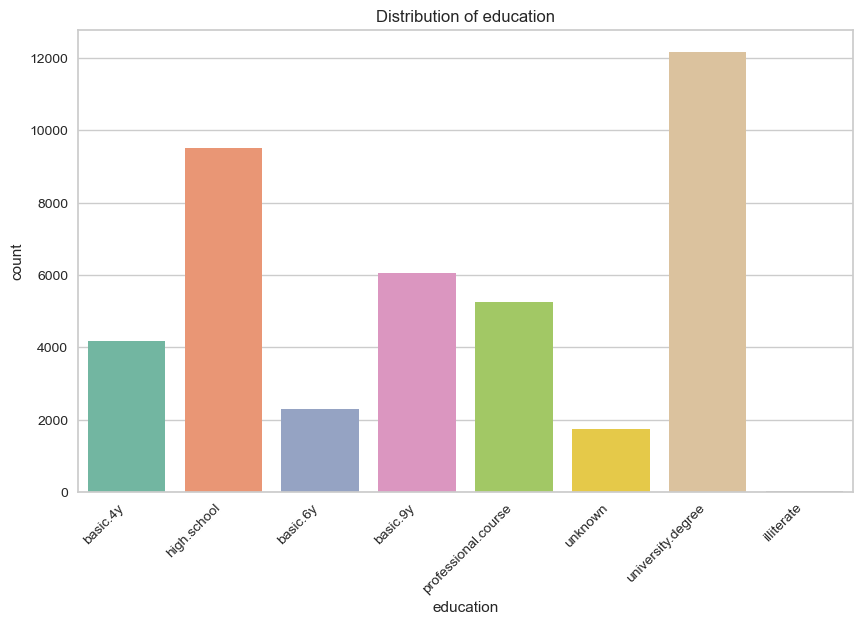

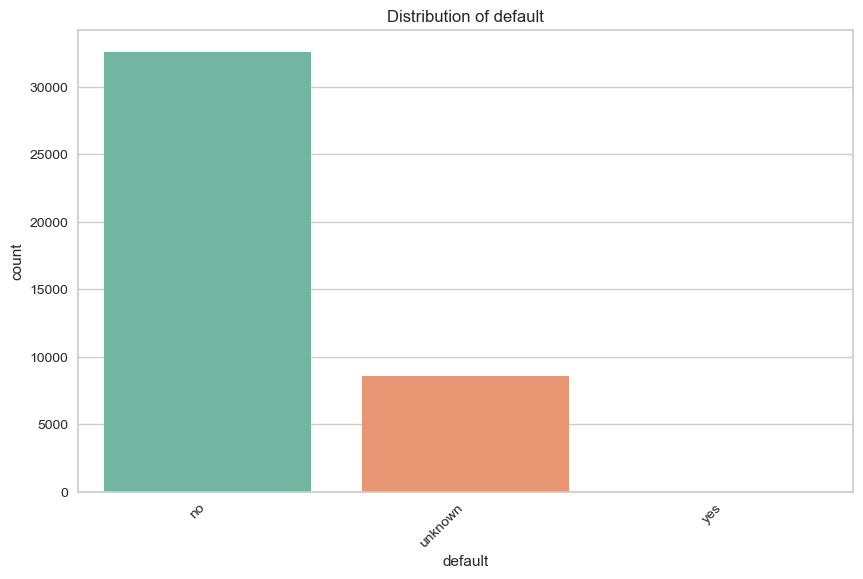

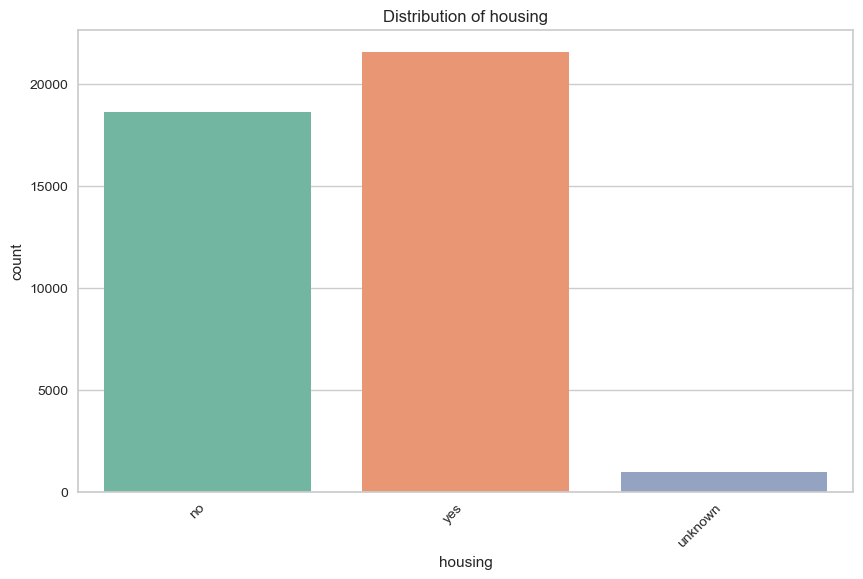

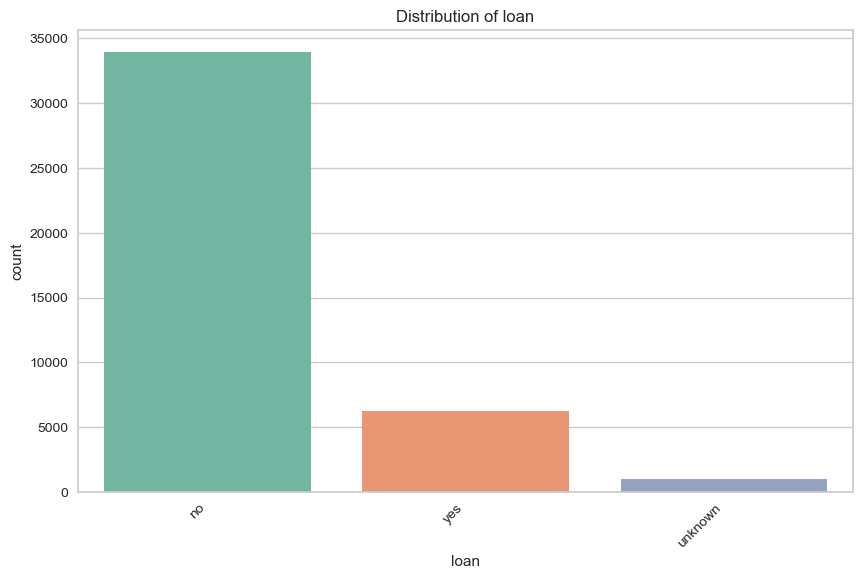

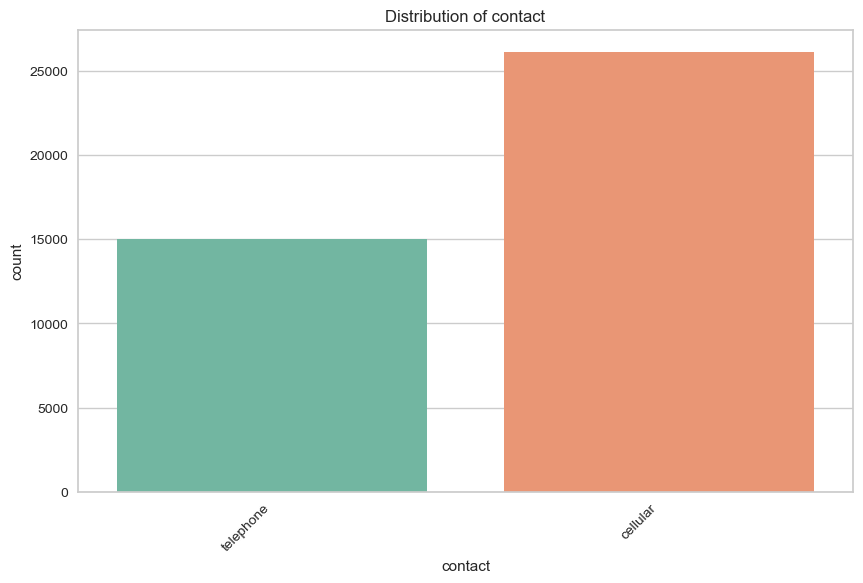

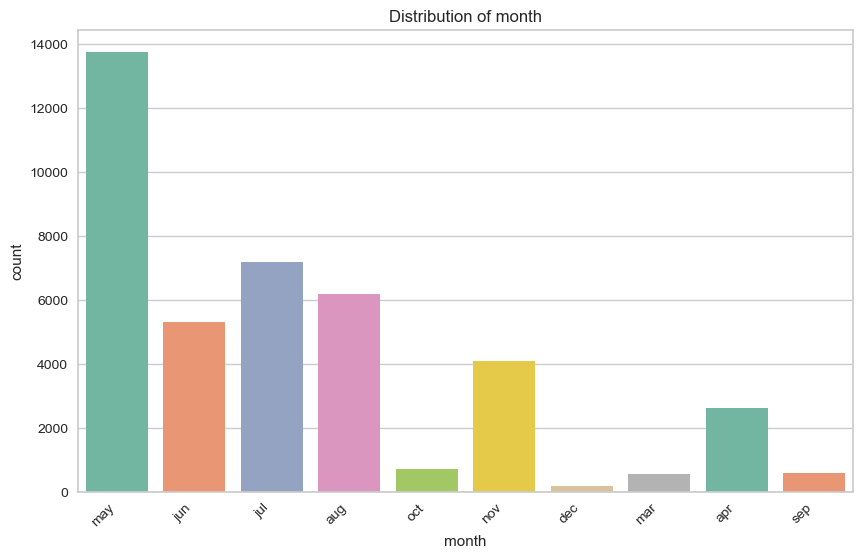

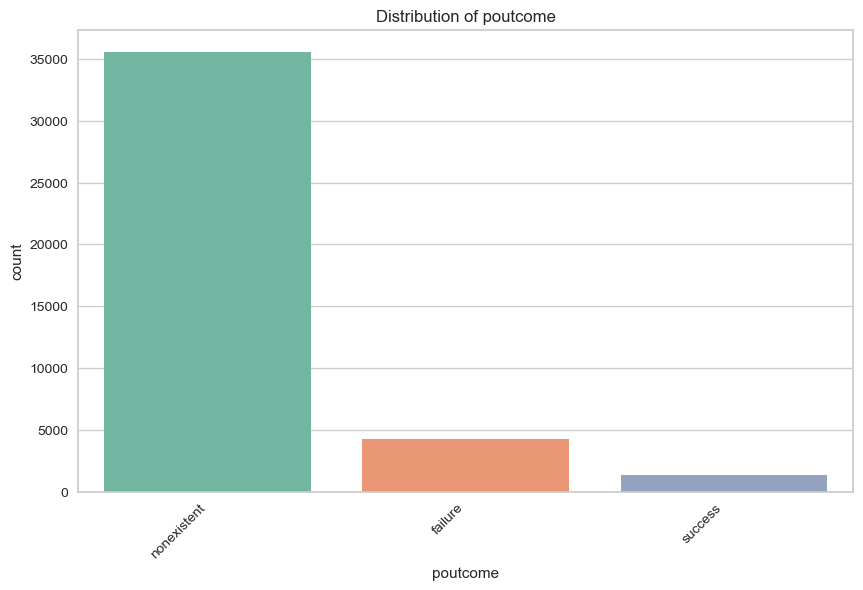

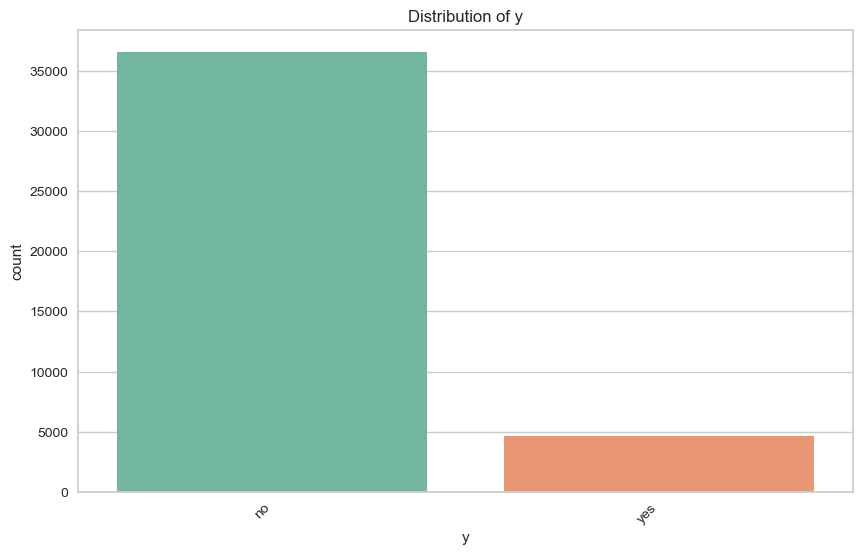

In [12]:
# Visualize the distribution of categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col}')
    plt.show()

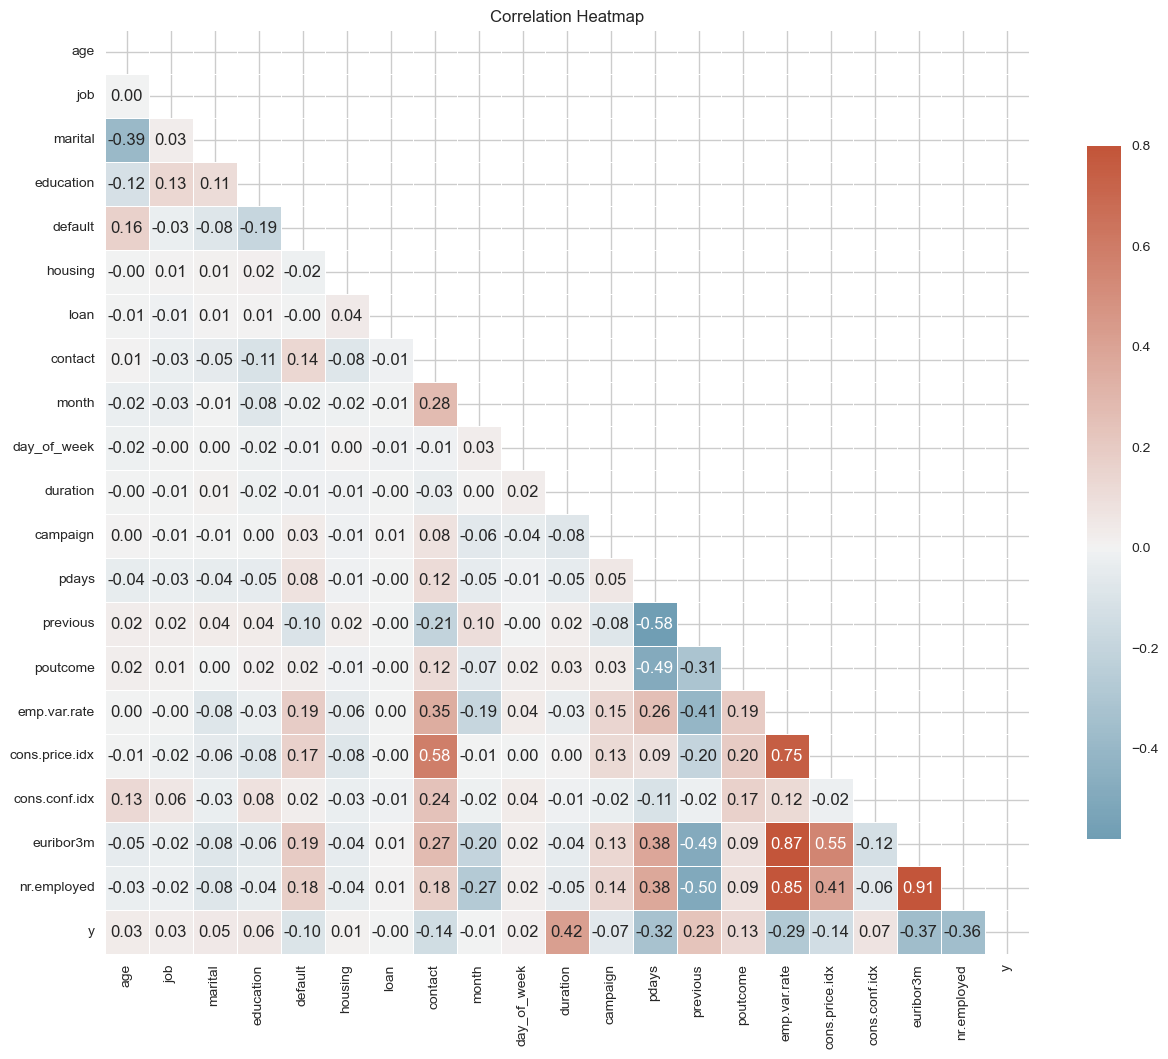

In [9]:

plt.figure(figsize=(15, 12))
corr = data.corr()

# Create a mask to hide the upper triangle of the plot
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.8, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75}, fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()


In [4]:
 # Initialize the label encoder
label_encoder = LabelEncoder()

# Iterate through each column and apply label encoding
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

# Concatenate the label-encoded features with the target variable
data = pd.concat([data], axis=1)

data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1


In [13]:
# separating the data & label
X = data.drop(columns = ['y'],axis=1)
y = data['y']
 

In [83]:
# Call the function with default parameters
accuracy_rf = feature_selection_with_RandomForest(X, y)

Feature Importance:
           Feature  Importance
10        duration    0.406797
18       euribor3m    0.103287
19     nr.employed    0.084322
0              age    0.060260
15    emp.var.rate    0.046482
17   cons.conf.idx    0.035376
1              job    0.030363
11        campaign    0.029419
3        education    0.028946
16  cons.price.idx    0.028290
9      day_of_week    0.026793
12           pdays    0.018822
14        poutcome    0.018295
8            month    0.017873
2          marital    0.015121
5          housing    0.011946
7          contact    0.011873
6             loan    0.009241
13        previous    0.008425
4          default    0.008068
Accuracy on the test set with selected features using Random Forest: 0.90


# Using all feature

In [70]:
# Assuming you have your features X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# For training
# Oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# For testing
# Oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy='minority')
X_test_over, y_test_over = oversampler.fit_resample(X_test, y_test)


Prior Probabilities for Gaussian Naive Bayes: {'0': 0.5, '1': 0.5}
Posterior Probabilities for Gaussian Naive Bayes - First Instance: [0.90377496 0.09622504]
Metrics for Gaussian Naive Bayes:
Accuracy: 0.8089
AUC: 0.9056
Recall: 0.7366
Precision: 0.8611
F1 Score: 0.7940


C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


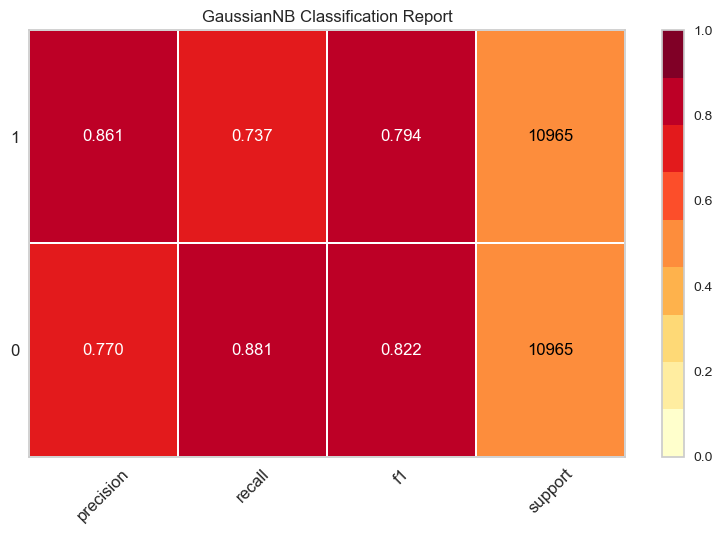

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


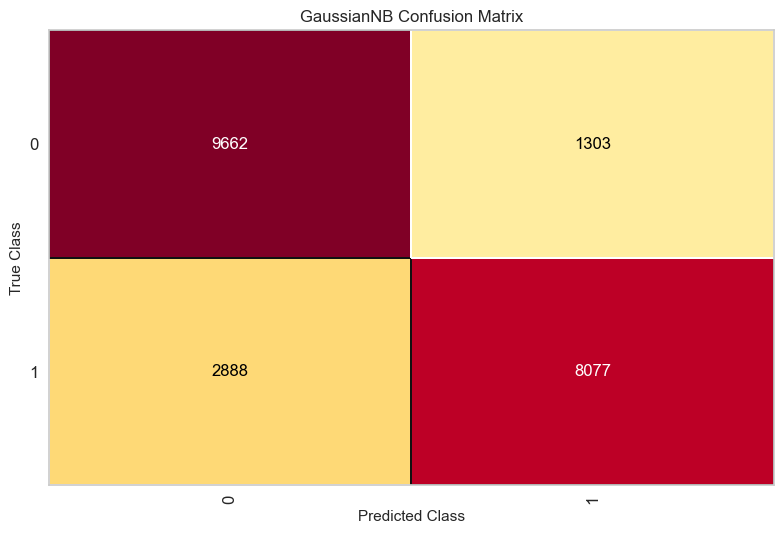

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


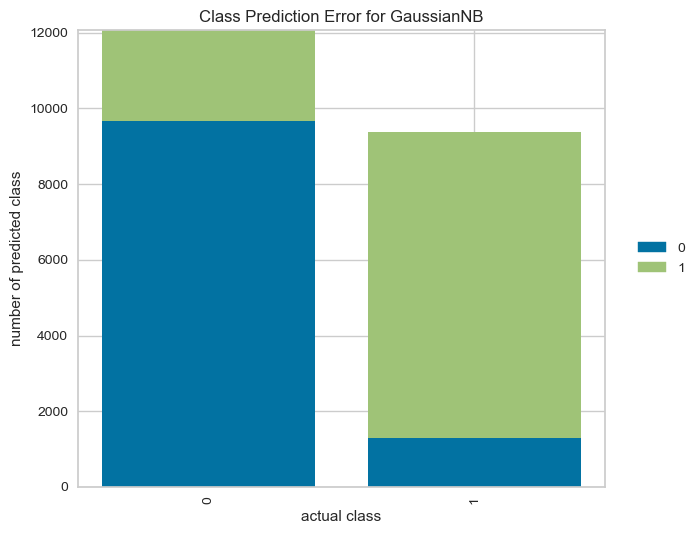

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


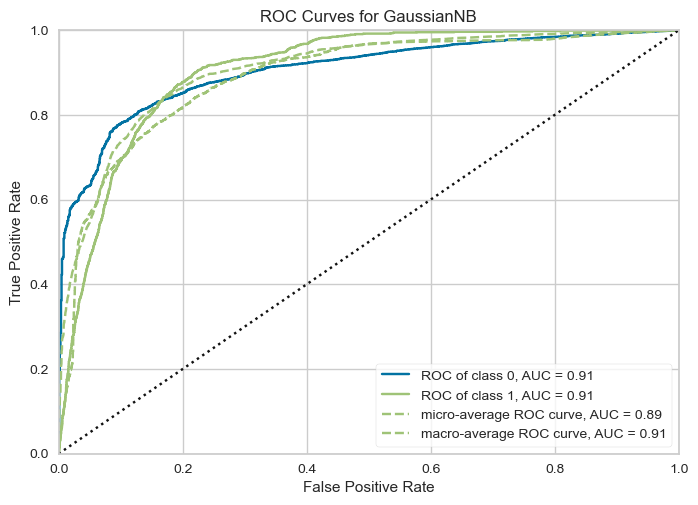

In [73]:
evaluate_Gaussian_naive_bayes(X_train_over, y_train_over, X_test_over, y_test_over)

# After feature selection

In [84]:
# separating the data & label
new_X = data[['nr.employed', 'euribor3m', 'age', 'duration','emp.var.rate', 'cons.conf.idx','job']]
new_y = data['y']

# Assuming you have your features X and target variable y
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42, stratify=y)  

# For training
# Oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# For testing
# Oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy='minority')
X_test_over, y_test_over = oversampler.fit_resample(X_test, y_test)

In [86]:
print('X_train_over dataset shape:', X_train_over.shape)
print('y_train_over dataset shape:', y_train_over.shape)
print('X_test_over dataset shape:', X_test_over.shape)
print('y_test_over dataset shape:', y_test_over.shape)

X_train_over dataset shape: (51166, 8)
y_train_over dataset shape: (51166,)
X_test_over dataset shape: (21930, 8)
y_test_over dataset shape: (21930,)


Prior Probabilities for Gaussian Naive Bayes: {'0': 0.5, '1': 0.5}
Posterior Probabilities for Gaussian Naive Bayes - First Instance: [0.98704191 0.01295809]
Metrics for Gaussian Naive Bayes:
Accuracy: 0.8328
AUC: 0.9046
Recall: 0.7964
Precision: 0.8589
F1 Score: 0.8265


C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


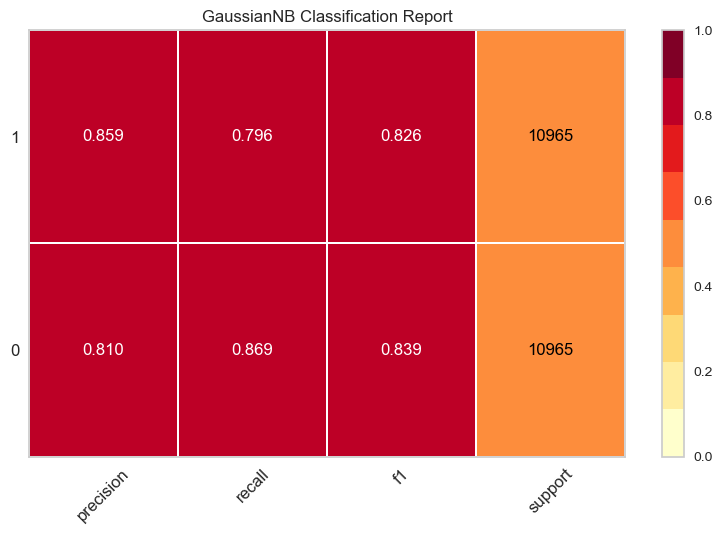

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


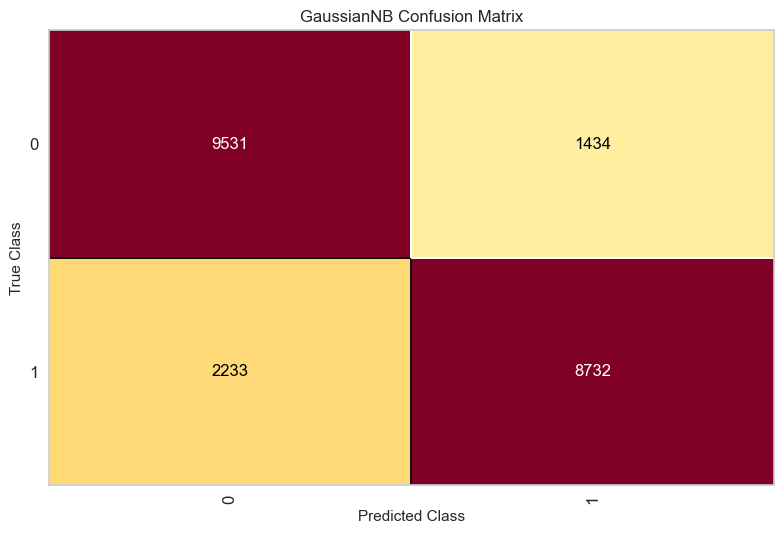

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


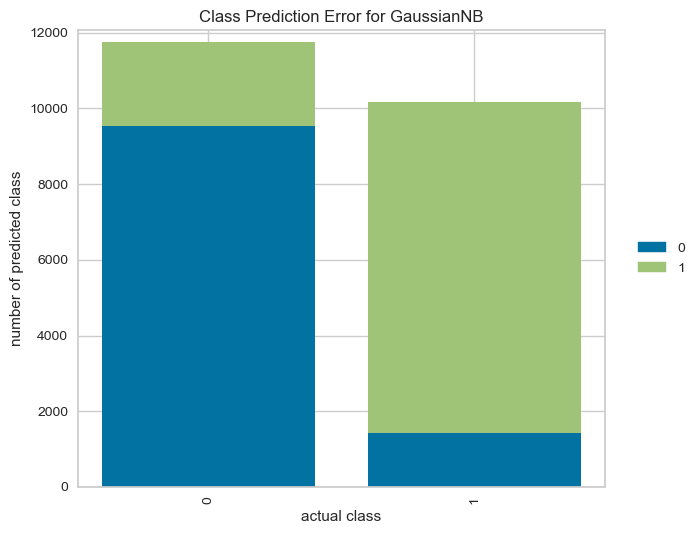

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


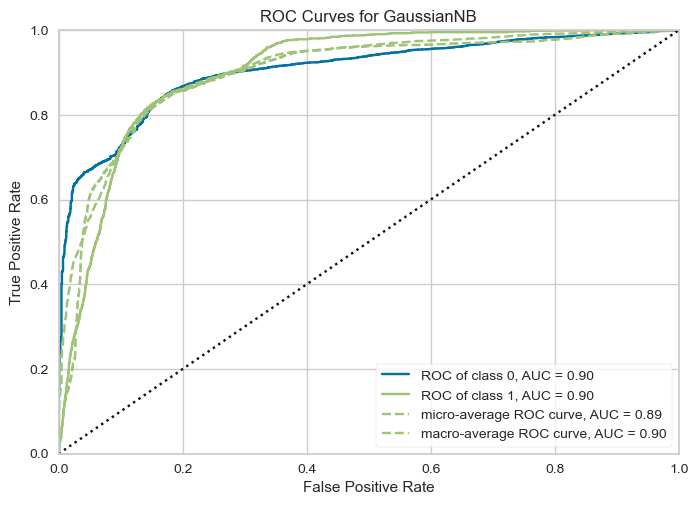

In [85]:
evaluate_Gaussian_naive_bayes(X_train_over, y_train_over, X_test_over, y_test_over)